# Notebook to develop S/N QA (mainly figures)  [v1]

In [13]:
# imports
import numpy as np

from matplotlib import pyplot as plt

import yaml

## Test file

In [3]:
tst_file = '/home/xavier/DESI/DESI_SCRATCH/18.3/spectro/redux/mini/QA/exposures/20200316/00000021/qa-b1-00000021.yaml'

In [65]:
# Read yaml
with open(tst_file, 'r') as infile:
    qa_data = yaml.load(infile)

### Check it

In [28]:
qa_data['20200316'][21]['b1']['S2N']['PARAMS']

{'BIN_SZ': 0.1,
 'B_CONT': [[4000.0, 4500.0], [5250.0, 5550.0]],
 'PCHI_RESID': 0.05,
 'PER_RESID': 95.0,
 'R_CONT': [[5950.0, 6200.0], [6990.0, 7230.0]],
 'SKYCONT_ALARM_RANGE': [50.0, 600.0],
 'SKYCONT_WARN_RANGE': [100.0, 400.0],
 'SKYRESID_ALARM_RANGE': [-10.0, 10.0],
 'SKYRESID_WARN_RANGE': [-5.0, 5.0],
 'Z_CONT': [[8120.0, 8270.0], [9110.0, 9280.0]]}

In [29]:
qa_data['20200316'][21]['b1']['S2N']['METRICS'].keys()

dict_keys(['FIDSNR_TGT', 'FILTERS', 'FITCOEFF_TGT', 'FITCOVAR_TGT', 'FIT_FILTER', 'MAGNITUDES', 'MEDIAN_SNR', 'NUM_NEGATIVE_SNR', 'OBJLIST', 'SCIENCE_FIBERID', 'SNR_MAG_TGT', 'STAR_FIBERID'])

In [41]:
qa_data['20200316'][21]['b1']['S2N']['METRICS']['OBJLIST']

{'SCIENCE', 'STD'}

### Short cut

In [30]:
s2n_dict = qa_data['20200316'][21]['b1']['S2N']['METRICS']

### Re-shape mags

In [32]:
all_mags = np.resize(np.array(s2n_dict['MAGNITUDES']), (500,3))
all_mags.shape

(500, 3)

In [34]:
fidx = np.where(np.array(qa_data['20200316'][21]['b1']['S2N']['METRICS']['FILTERS']) == qa_data['20200316'][21]['b1']['S2N']['METRICS']['FIT_FILTER'])[0]
fidx                                                                                                                                       

array([0])

In [36]:
mags = all_mags[:,fidx].flatten()
mags.shape

(500,)

### Good sources (some are Infinite!)

In [37]:
gd_mag = np.isfinite(mags)
np.sum(~gd_mag)

40

## Plots

### Scatter me

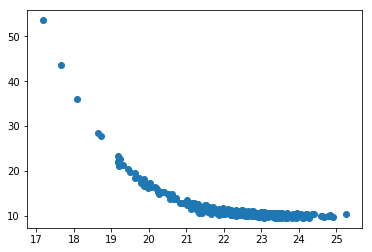

In [38]:
plt.clf()
ax=plt.gca()
#
ax.scatter(mags[gd_mag], np.array(s2n_dict['MEDIAN_SNR'])[gd_mag])
#
plt.show()

### Residual

In [57]:
exptime = qa_data['20200316'][21]['b1']['S2N']['METRICS']['EXPTIME']
exptime

1068.323891763002

In [66]:
r2= qa_data['20200316'][21]['b1']['S2N']['METRICS']['r2']
funcMap={"linear":lambda x,a,b:a+b*x,
         "poly":lambda x,a,b,c:a+b*x+c*x**2,
         "astro":lambda x,a,b:(exptime*a*x)/np.sqrt(exptime*(a*x+b)+r2)
        }

In [59]:
fitfunc = funcMap['astro']

In [46]:
sci_idx = qa_data['20200316'][21]['b1']['S2N']['METRICS']['OBJLIST'].index('SCIENCE')
sci_idx

0

In [47]:
coeff = qa_data['20200316'][21]['b1']['S2N']['METRICS']['FITCOEFF_TGT'][sci_idx]
coeff

[0.05791168068235259, -0.0044115706502497465]

In [77]:
x=10**(-0.4*(mags[gd_mag]-22.5))
fit_snr = fitfunc(x,  *coeff)
fit_snr[0:50]

array([  5.79620622,   7.15452713,   5.71782467,   5.71604341,
         7.8639641 ,   7.2081788 ,  11.10423231,  22.46103968,
         7.17012273,   5.78549164,  10.51648282,   4.45533702,
         7.17697602,   5.89966137,   6.80920753,  10.10075456,
         7.5282484 ,   6.67451784,  12.23896414,   7.24225202,
         9.18734387,   5.97050674,   7.27708887,   7.06806764,
         6.92070382,  27.42383256,   4.98832502,   8.31326323,
        25.71339019,   6.81010288,   5.81169372,  22.27393077,
         8.38023908,   6.47281564,  19.87556335,   7.66118462,
         7.50468292,  19.31419584,   6.46496386,   5.7975333 ,
         4.54790137,   6.18770204,   8.45856011,   7.39619724,
        15.57234936,  12.13804909,   6.10441446,   6.46765211,
         5.39678052,   5.51246637])

In [68]:
r2

0.0

In [78]:
resid = (np.array(s2n_dict['MEDIAN_SNR'])[gd_mag]-fit_snr)/fit_snr

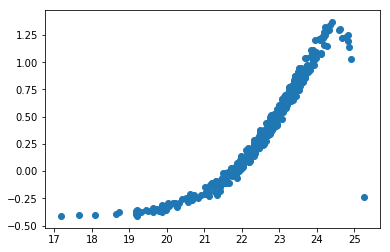

In [79]:
plt.clf()
ax=plt.gca()
#
ax.scatter(mags[gd_mag], resid)
#
plt.show()

### With fit

/home/xavier/.pyenv/versions/anaconda3-4.3.1/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in sqrt
  This is separate from the ipykernel package so we can avoid doing imports until


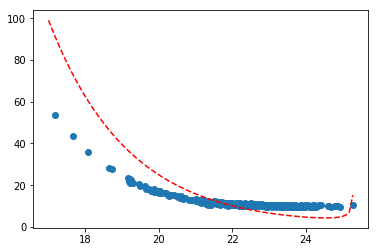

In [73]:
plt.clf()
ax=plt.gca()
#
ax.scatter(mags[gd_mag], np.array(s2n_dict['MEDIAN_SNR'])[gd_mag])
# Fit
xmag = np.linspace(17., 26., 100)
xval=10**(-0.4*(xmag-22.5))
yval = fitfunc(xval, *coeff)
ax.plot(xmag, yval, '--r')
#
#ax.set_ylim(5., 20.)
#
plt.show()

----

In [22]:
np.array(s2n_dict['MAGNITUDES']).size

1500

In [21]:
np.array(s2n_dict['MEDIAN_SNR']).size

500